# Project final:

Team:
- Kiều Hải Đăng - 19127347
- Lã Minh Hiếu - 19127400

**Link to** [Github](https://github.com/devlmhieu7521/LTKHDL_Final)**.**

# Collecting data:

**1.1 The subject of data:**

- The dataset about TED Talks on the TED.com

**1.2 The origin of data:**
- We get dataset form [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

**1.3 The licence of data:**
- The licence is [CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/)

**1.4 How did authors collect data?**
- The data has been scraped from the official TED Website.

**1.5 Data describtion**
- These datasets contain information of all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. 


## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import json
import ast
import datetime as dt
from sklearn.impute import SimpleImputer

In [2]:
import sys
sys.executable

'/Library/Conda/miniconda3/envs/min_ds-env/bin/python'

# Exploring data

- How many rows and how many columns?
- What is the meaning of each row?

    - Are there **duplicated** rows?
    - What is the meaning of each column?
    - What is the current data type of each column? Are there columns having inappropriate data types?
    
    - With each **numerical** column, how are values distributed?
        - What is the percentage of missing values?
        - Min? max? Are they abnormal?
        
    - With each **categorical** column, how are values distributed?
        - What is the percentage of missing values?
        - How many different values? Show a few
        - Are they abnormal?

## Read data from csv to dataframe 

In [3]:
ted_df = pd.read_csv('ted_main.csv')
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## How many rows and columns does the data have?

In [5]:
n_rows, n_cols = ted_df.shape
n_rows, n_cols

(2550, 17)

## What is the meaning of each row?

Each row represents for a video/audio on ted.com

## Are there duplicated rows

In [6]:
ted_df.duplicated().any()

False

## What is the meaning of each column?

There are the description of each column in [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

- **comments**: The number of first level comments made on the talk
- **description**: A blurb of what the talk is about
- **duration**: The duration of the talk in seconds
- **event**: The TED/TEDx event where the talk took place
- **film_date**: The Unix timestamp of filming
- **languages**: The number of languages in which the talk is available
- **main_speaker**: The first named speaker of the talk
- **name**: The official name of the TED Talk. Includes the title and speaker
- **num_speaker**: The number of speakers in the talk
- **published_date**: The Unix timestamp for the publication of the talk on TED.com
- **ratings**: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- **related_talk**: A list of dictionaries of recommended talks to watch next
- **speaker_occupation**: The occupation of the main speaker
- **tags**: The themes associated with the talk
- **title**: The title of the talk
- **url**: The URL of the talk
- **views**: The number of views on the talk

## What is the current data type of each column? Are there columns having inappropriate data types?

In [7]:
col_dtypes = ted_df.dtypes
col_dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

`ted_df` has 10 columns which have `object` data types:
- "description","event","main_speaker","name","ratings","related_talks","speaker_occupation","tags","title","url".
- However, 
    - "ratings" now is a string `{'id': 7, 'name': 'Funny', 'count': 19645}`, need to convert to list of dictionary
    - "tags" now is a string, but actually it's a list.
- "film_date" and "published_date" is `int64` data type.

## With each numerical column
- What is the percentage of missing values?
- Min? max? Are they abnormal?

### Transform the data type of "film_date" and "published_date" to dataframe

In [8]:
ted_df['film_date'] = pd.to_datetime(ted_df['film_date'],unit='s')
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'],unit='s')

**Convert to list function**

In [9]:
def convert_to_list(x):
    return ast.literal_eval(x)

### Transform the data type of "ratings" to list of dict

In [10]:
ted_df['ratings'] = ted_df['ratings'].apply(lambda x : convert_to_list(x))

In [11]:
def get_total_ratings(x):
    total = 0
    for i in x:
        total = total + i['count']
    return total
ted_df['total_ratings'] = ted_df['ratings'].apply(lambda x : get_total_ratings(x))

In [12]:
def missing_ratio(s):
    return s.isna().mean()*100
num_cols = ted_df[['comments','film_date',
                   'duration','languages',
                   'num_speaker','published_date',
                   'views','total_ratings']]
num_col_profiles_df = num_cols.agg([missing_ratio,pd.Series.min,pd.Series.max])
num_col_profiles_df

,comments,film_date,duration,languages,num_speaker,published_date,views,total_ratings
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.0,1972-05-14 00:00:00,135.0,0.0,1.0,2006-06-27 00:11:00,50443.0,68.0
max,6404.0,2017-08-27 00:00:00,5256.0,72.0,5.0,2017-09-22 15:00:22,47227110.0,93850.0


min, max are not abnormal.

## With each categorical column
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [13]:
def unique_not_nan(s):
    return s.dropna().unique()
cate_cols = ted_df[["description","event",
                    "main_speaker","name","related_talks",
                    "speaker_occupation",
                    "tags","title","url"]]
cate_col_profiles_df = cate_cols.agg([missing_ratio,pd.Series.nunique,unique_not_nan])
cate_col_profiles_df.index = ["missing_ratio", "num_diff_vals", "diff_vals"]
cate_col_profiles_df

,description,event,main_speaker,name,related_talks,speaker_occupation,tags,title,url
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.235294,0.0,0.0,0.0
num_diff_vals,2550,355,2156,2550,2550,1458,2530,2550,2550
diff_vals,[Sir Ken Robinson makes an entertaining and pr...,"[TED2006, TED2004, TED2005, TEDGlobal 2005, TE...","[Ken Robinson, Al Gore, David Pogue, Majora Ca...","[Ken Robinson: Do schools kill creativity?, Al...","[[{'id': 865, 'hero': 'https://pe.tedcdn.com/i...","[Author/educator, Climate advocate, Technology...","[['children', 'creativity', 'culture', 'dance'...","[Do schools kill creativity?, Averting the cli...",[https://www.ted.com/talks/ken_robinson_says_s...


In general, we see that the data is normally distributed, but with the speaker_occupation column, the data is missing 0.23%, so we proceed to fill in the missing value with mode.

## Data prerocessing fill value for `speaker_occupation`

Use `SimpleImputer` from sklearn to fill missing value with mode value of the column.

In [14]:
mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode.fit(np.array(ted_df['speaker_occupation']).reshape(-1, 1))
a = mode.transform(np.array(ted_df['speaker_occupation']).reshape(-1, 1))
ted_df['speaker_occupation'] = a.flatten()

In [15]:
ted_df.sample(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,total_ratings
1963,171,"As kids, we all get advice from parents and te...",312,TED2015,2015-03-10,34,Clint Smith,Clint Smith: How to raise a black son in America,1,2015-04-23 15:00:55,"[{'id': 22, 'name': 'Fascinating', 'count': 35...","[{'id': 2059, 'hero': 'https://pe.tedcdn.com/i...","Poet, educator","['inequality', 'poetry', 'race', 'social chang...",How to raise a black son in America,https://www.ted.com/talks/clint_smith_how_to_r...,1908266,3662
1817,38,Dan Barasch and James Ramsey have a crazy plan...,377,TED@NYC,2014-07-09,30,Dan Barasch,Dan Barasch: A park underneath the hustle and ...,1,2014-09-10 14:55:40,"[{'id': 25, 'name': 'OK', 'count': 78}, {'id':...","[{'id': 1182, 'hero': 'https://pe.tedcdn.com/i...",Strategist,"['New York', 'architecture', 'cities']",A park underneath the hustle and bustle of New...,https://www.ted.com/talks/dan_barasch_a_park_u...,862238,879


# Asking meaningful questions

1. How is the distribution of the number of events over the years? Anything unusual? make a comment.
2. Top 10 interesting videos on `ted.com`.
3. The factor affect to views.   
    + Relationship between "Views" and "Duration
    + Relationship between length of "Title" and "Views"
    + The total "Views" through each year
4. Ratings question.
    + Ranking kinds of rating for video
    + Which video has the most ratings of inspiring through each year?
    + Group by data by "Year_published" to visualize the positive ratings and negative ratings through each year
5. Top 10 popular video content on `ted.com`? From there draw comments.
    + The most popular content on ted

## Preprocessing + analyzing data to answer each question

### Transform the data type of "tags" to list

In [16]:
ted_df['tags'] = ted_df['tags'].apply(lambda x: convert_to_list(x))

### Add published year column

In [17]:
ted_df['Year_published'] = ted_df['published_date'].dt.year

## How is the distribution of the number of events over the years? Anything unusual? make a comment.

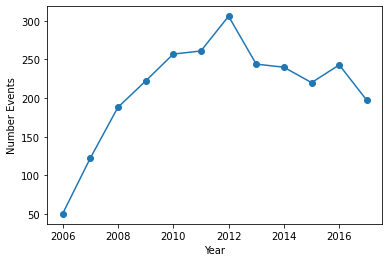

In [18]:
Q1 = ted_df.groupby('Year_published')['event'].count()
Q1.plot.line(ylabel = 'Number Events', xlabel = 'Year', marker='o');

**Comment:**
- The distribution of the number of events `ted` organized over the years is fluctual but in general the number of events has been organized more recently than in the past.
- Maybe they want to impart more knowledge, promote the brand, or maybe they just make a lot of money from the events.

## Data preprocessing (View)

In [19]:
df_top_video = ted_df.sort_values('views',ascending=False).head(10)
df_top_video['title'].reset_index(drop=True,inplace=True)
df_top_video['views'].reset_index(drop=True,inplace=True)

a = {}
for i in range(len(df_top_video['title'])):
    name = df_top_video['title'][i]
    a[f'{name}'] = df_top_video['views'][i]
a = dict(sorted(a.items(), key=lambda item: item[1]))

## Top 10 interesting videos/audio on `ted.com`.

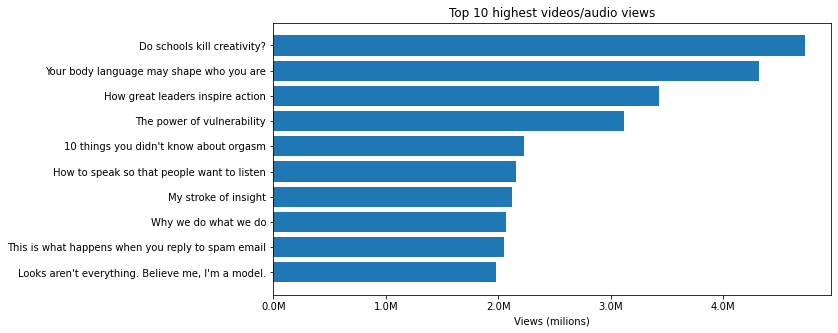

In [20]:
def millions(x, pos):
    return '{:1.1f}M'.format(x*1e-7)
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(millions)
ax.barh(list(a.keys()),list(a.values()))
plt.xlabel('Views (milions)')
plt.title('Top 10 highest videos/audio views');


**Comment:**
- These are the top 10 most viewed video - audio on `ted.com`. If you don't know what to watch on `ted.com`, there are good recommends video - audio for you.

## The factor affect to views.

 ### Relationship between "Views" and "Duration"

- Step 1: In "duration" column, we transform it to minutes.
- Step 2: Visualize this relation in scatter chart

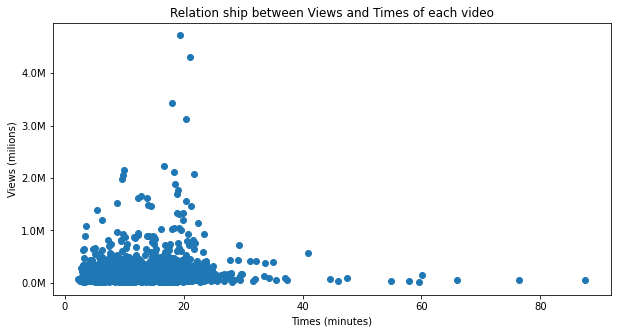

In [21]:
# những yếu tố ảnh hưởng đến lượt views
ted_df['duration'] = ted_df['duration'].apply(lambda x: x/60)
def millions(x, pos):
    return '{:1.1f}M'.format(x*1e-7)
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(millions)
plt.scatter(ted_df['duration'],ted_df['views'])
plt.xlabel('Times (minutes)')
plt.ylabel('Views (milions)')
plt.title('Relation ship between Views and Times of each video');

**Comment:**
- Most videos with high views are around 20 minutes. Perhaps users prefer to watch videos that are not too long.

### Relationship between length of "Title" and "Views"

- Step 1: Calculate the length of the "Title"
- Step 2: Visualize this relation in scatter chart

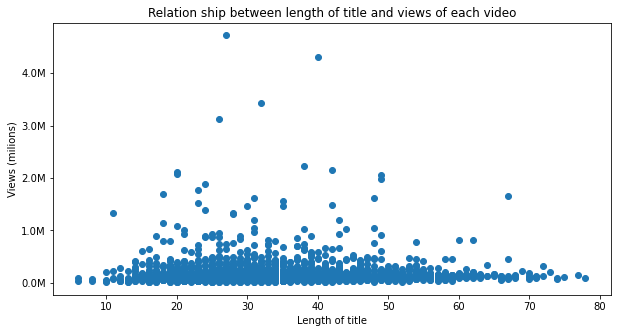

In [22]:
ted_df['Length of title'] = ted_df['title'].apply(lambda x: len(x))
def millions(x, pos):
    return '{:1.1f}M'.format(x*1e-7)
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(millions)
plt.scatter(ted_df['Length of title'],ted_df['views'])
plt.xlabel('Length of title')
plt.ylabel('Views (milions)')
plt.title('Relation ship between length of title and views of each video');

**Comment:**
- As we can see, the length of title may affect to the views of the video:
    - In x axis, most of the video which have the length of title from 15 to 50 will have more views than the other. I think that it is easy to understand because of as the user when I look at the title of video then I understand it quickly and I decide to watch it or not. However, If the video has a long title, sometimes a user may not read the title and skip this video.
    - In our opinion, the short title may interest the viewer more than the long title because they can understand quickly about the content of the video.


### The total "Views" through each year

- Step 1: Group by "year_published" and sum()
- Step 2: Visualize this relation in line chart

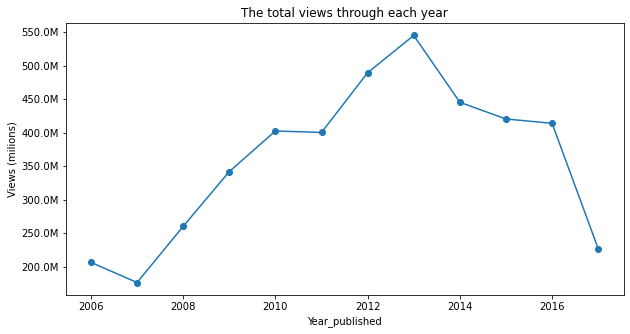

In [23]:
df = ted_df.groupby('Year_published').sum()['views']
def millions(x, pos):
    return '{:1.1f}M'.format(x*1e-6)
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(millions)
df.plot.line(marker='o')
plt.ylabel('Views (milions)')
plt.title('The total views through each year');

**Comment:**
- Starting in 2008, google launched the world's first android smartphone, also a year after apple released the first iphone, since the time iPhone and Android appeared on the market. Smartphone, this market has had "rocket" growth, when in 2008 only about 139 million smartphones were used, this number increased to 2.6 billion devices in 2016. Thanks to that, the the majority of ordinary users can access the internet easily. They are more curious to explore the world. So we think that's why ted's views exploded.
- However, the views of videos have a downward trend from 2013, there are some reasons of our research:
    - Firsly, anti-racism protests in the United States took place in 2014 along with the migration crisis in Europe. During this period, technological devices are all manufactured in Western countries, thus causing production delays as well as the number of mobile device users will be reduced.
    - Secondly, Terrorist attacks spread across Europe from November 2015 to the end.
    - Thirdly, in 2017 there was a wannacry pandemic. Since the 2016 US presidential election, fake news has appeared more and more, along with a series of malicious and objectionable content appearing more and more online, affecting user psychology.
    - Finally, the time of collecting this data is shorter than the other.

## Data processing (continue): Ratings

### The kinds of ratings for video

In [24]:
def arr_name(x):
    a = []
    for i in x:
       
        a.append(i['name'])
    return a
ted_df['list_name_rating'] = ted_df['ratings'].apply(lambda x : arr_name(x))

In [25]:
df_ratings = ted_df.apply(lambda x: pd.Series(x['list_name_rating']),axis=1).stack().reset_index(level=1,drop=True)
df_ratings.name = 'name_rating'
df_ratings  = ted_df.join(df_ratings)
df_ratings.value_counts('name_rating')

name_rating
Beautiful       2550
Confusing       2550
Courageous      2550
Fascinating     2550
Funny           2550
Informative     2550
Ingenious       2550
Inspiring       2550
Jaw-dropping    2550
Longwinded      2550
OK              2550
Obnoxious       2550
Persuasive      2550
Unconvincing    2550
dtype: int64

- As we can see, the distribution of the number of kind of ratings for each video is even. And we have 14 kinds of ratings for the video:
    - `Beautiful, Courageous, Fascinating, Funny, Informative, Ingenious, Inspiring, Jaw-dropping, OK, Persuasive` are a positive ratings.
    - `Confusing, Longwinded, Obnoxious, Unconvincing` are a negative ratings.


### Ranking kinds of rating for video
- Step 1: Add column which is a counting of each rating for each video
- Step 2: Calculate the sum of each column (kinds of rating)
- Step 3: Visualize with bar horizontal

**Step 1:** Add column which is a counting of each rating for each video

In [26]:
def count_rating(x,column):
    for i in x:
        if i['name'] == column:
            return i['count']
name_columns = df_ratings.value_counts('name_rating').index
for i_name in name_columns:
    ted_df[f'{i_name}_ratings'] = ted_df['ratings'].apply(lambda x: count_rating(x,i_name))

**Step 2:** Calculate the sum of each column (kinds of rating) and sort dictionary `a`

In [27]:
a = {}
for i_name in name_columns:
    a[f'{i_name}'] = ted_df[f'{i_name}_ratings'].sum()
a = dict(sorted(a.items(), key=lambda item: item[1]))

**Step 3:** Visualize with bar horizontal

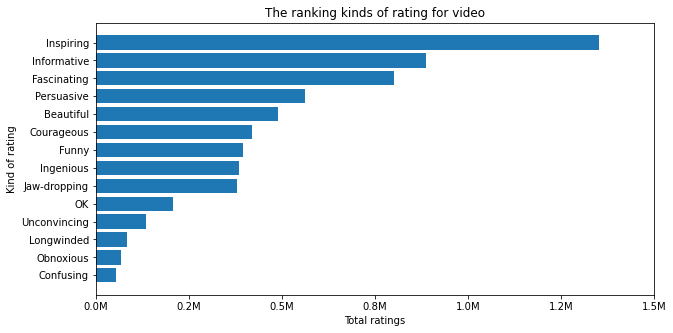

In [28]:
def millions(x, pos):
    return '{:1.1f}M'.format(x*1e-6)
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(millions)
ax.barh(list(a.keys()),list(a.values()))
plt.xlabel('Total ratings')
plt.ylabel('Kind of rating')
plt.xticks([0,250000,500000,750000,1000000,1250000,1500000])
plt.title('The ranking kinds of rating for video')
plt.show()


**Comment:**
- Most of the video on `ted.com` have a good content to inspire, give a lot of information for everybody, ...
- A little video have longwinded, unconvincing, obnoxious, confusing.
- However, through the chart I think `ted.com` is a powerful website for everybody to learn new things.

### Which video has the most ratings of inspiring through each year?
---**Step to deal with this question**---

- Step 1: Group by `Year_published` and `title`
- Step 2: Unstack the data grouped by with each column is the number of inspiring ratings by year published of each video
- Step 3: Find the highest ratings of video in year


In [29]:
ratings = ted_df[['Year_published','title','Inspiring_ratings']]
most_video_by_year = ratings.groupby(['Year_published','title']).sum()
most_video_by_year = most_video_by_year.unstack(0)
most_video_by_year = most_video_by_year.idxmax(axis=0).to_frame() 
most_video_by_year.columns = ['title']
detail_most_video_by_year = most_video_by_year.merge(ratings)
detail_most_video_by_year

,title,Year_published,Inspiring_ratings
0,Do schools kill creativity?,2006,24924
1,The habits of happiness,2007,3774
2,My stroke of insight,2008,16918
3,The danger of a single story,2009,9566
4,How great leaders inspire action,2010,21564
5,How to live before you die,2011,17290
6,Your body language may shape who you are,2012,21210
7,Every kid needs a champion,2013,5946
8,Why good leaders make you feel safe,2014,8569
9,Why we all need to practice emotional first aid,2015,13398


So we can choose each inspiring video to watch if you're stress :))

### Group by data by "Year_published" to visualize the positive ratings and negative ratings through each year

- Step 1: Preprocessing data (add 2 columns which means the positive ratings and negative ratings)
- Step 2: Group by years to visualize
- Step 3: Visualize to answer the question

**Step 1**: Preprocessing data (add 2 columns which means the positive ratings and negative ratings)

**Add column named "positive_ratings:"** is about the positive ratings

In [30]:
def count_positive_rating(x):
    for i in x:
        if i['name'] in ['Beautiful', 'Courageous',
                         'Fascinating', 'Funny',
                         'Informative', 'Ingenious',
                         'Inspiring', 'Jaw-dropping',
                         'OK', 'Persuasive'] :
            return i['count']
ted_df['positive_ratings'] = ted_df['ratings'].apply(lambda x: count_positive_rating(x))

**Add column named "negative_ratings:"** is about the negative ratings

In [31]:
def count_negative_rating(x):
    for i in x:
        if i['name'] in ['Confusing', 'Longwinded', 'Obnoxious', 'Unconvincing'] :
            return i['count']
ted_df['negative_ratings'] = ted_df['ratings'].apply(lambda x: count_negative_rating(x))

**Step 2:** Group by years to visualize

In [32]:
groupby_year = ted_df.groupby('Year_published').sum()

**Step 3:** Visualize to answer the question

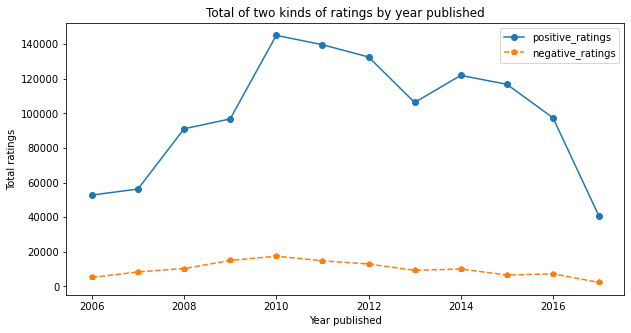

In [37]:
plt.figure(figsize=(10,5))
plt.plot(groupby_year['positive_ratings'], label ='positive_ratings',marker='o',linestyle='solid')
plt.plot(groupby_year['negative_ratings'], label ='negative_ratings',marker='p',linestyle='dashed')
plt.xlabel('Year published')
plt.ylabel('Total ratings')
plt.title('Total of two kinds of ratings by year published')
plt.legend();

**Comment:**
- As we can see, the total number of positive ratings is many times more than negative ratings.
- Most video on `ted.com` have a positive ratings. A lot of content which inspire, give a lot of information for everyone who need to find something news, to get new knowledges.
- In the number of positive ratings, from 2006 to 2010, there is an upward trend in positive ratings. After that, there is a downward trend to 2017. I think the video uploaded in advance will have more rating than the new one. Besides that, people just watch the video and don't give any recommend for the later user.

## Data preprocessing tag

+ Step1: Get list of tag on the row, stack it and reset index of the MultiIndex to level 1 and drop it out.
+ Step2: Join the `df_tags` with `ted_df` to get the full data match with the starting data frame index.
+ Step3: Get top 10 tag counts.
+ Step4: Visualize.

### Top 10 popular video content on `ted.com`? From there draw comments.

**Top 10 tag**

In [34]:
df_tags = ted_df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1,drop=True)
df_tags.name = 'tag'
df_tags  = ted_df.drop('tags', axis=1).join(df_tags)
tag_count = df_tags['tag'].value_counts()
TOP_10_popular_content = tag_count.head(10)

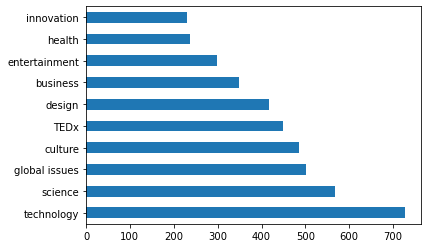

In [35]:
TOP_10_popular_content.plot.barh();

**Comment:**
- The top 10 most popular content on ted mainly fall into the fields of science, culture and art, most of which are related to science and technology. Maybe due to the explosion of digital technology, in recent years, most people around the world share the same vision that is to industrialize and automate everything.

### The most popular content on ted

In [36]:
tag_by_year = df_tags.groupby('Year_published')['tag'].value_counts()
tag_by_year = pd.DataFrame(tag_by_year)
tag_by_year = pd.DataFrame(tag_by_year.stack().droplevel(2))
tag_by_year.columns = ['count']
tag_by_year = tag_by_year.reset_index().groupby('Year_published').head(1)
tag_by_year.reset_index(drop=True)

,Year_published,tag,count
0,2006,culture,33
1,2007,technology,54
2,2008,technology,76
3,2009,technology,79
4,2010,technology,64
5,2011,culture,90
6,2012,TEDx,124
7,2013,technology,63
8,2014,technology,42
9,2015,technology,39


**Comment:**
- Above are statistics on popular topics on ted over the years. Looking at the datasheet, we see that technology is a hot topic, consistently ranking in the top 1 for most of the years based on the data set.

# Reflection

- Each member: What difficulties have you encountered?
- Each member: What have you learned?
- Your group: If you had more time, what would you do?

`19127347` - Kiều Hải Đăng

- Difficulties: Data processing, the career part doesn't know how to separate.
- Learned: Learn more about json, visualize, pandas functions, regular expression, SimpleImputer to fill value, and some extra knowledge.

`19127400` - Lã Minh Hiếu

- Difficulties: 
    - Preprocessing with ratings and tags; to divide it into each ratings and tags.
    - Asking a question
- Learned: Learn about `ted.com`, teamwork, preprocessing data.

- If we had more time:
    + Improve the questions so that they are higher quality, more realistic.
    + Deeper analysis of the data.
    + Think about data, maybe use this data to make a recommender systems by ratings (machine learning)

# Reference
1. [Data set](https://www.kaggle.com/rounakbanik/ted-talks).
2. https://gocnhintangphat.com/timestamp-la-gi/.
3. https://rstudio-pubs-static.s3.amazonaws.com/321337_38458c80a3fb4edf8755e8bce876e822.html.
4. https://stackoom.com/en/question/3w6dO.
5. https://www.guru99.com/python-json.html.
6. https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.
7. https://pretagteam.com/question/how-to-replace-special-characters-in-a-string-python.
8. https://dantri.com.vn/suc-manh-so/cong-nghe-da-thay-doi-the-gioi-the-nao-tu-nam-2008-den-nay-20161114134544451.htm.
9. https://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object.
10. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html.
11. https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv.
12. https://vnexpress.net/10-su-kien-cong-nghe-nam-2017-3683158.html.
13. https://dangcongsan.vn/the-gioi/10-su-kien-the-gioi-noi-bat-nam-2016-421610.html.
14. https://bnews.vn/10-su-kien-the-gioi-noi-bat-nam-2015-do-ttxvn-binh-chon/6471.html.
15. https://dantri.com.vn/the-gioi/10-su-kien-the-gioi-noi-bat-nam-2014-1420303813.htm
